In [3]:
import re
import unicodedata
import pandas as pd
import nltk

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [20]:
# Function to clean data
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [21]:
# Read in csv data and store as variable df
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
# Big strings
all_text = " ".join(df.text)
spam_text = " ".join(df[df.label == "spam"].text)
ham_text = " ".join(df[df.label == "ham"].text)

In [22]:
# Create variables that are lists of words for each category: ham words, spam words, and all words
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [35]:
all_words[:5]

['go', 'jurong', 'point', 'crazy', 'available']

In [23]:
# Create variables that are list the value counts for each category
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [24]:
# Combine value count variables into a single dataframe
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


### Most frequently occuring words

In [26]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
u,1182,1027,155
call,600,241,359
2,478,305,173
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5


### Most frequent ham words

In [27]:
word_counts.sort_values(by='ham', ascending=False).head(10)

,all,ham,spam
u,1182,1027,155
im,462,449,13
get,397,314,83
2,478,305,173
ltgt,276,276,0
go,304,273,31
ok,277,272,5
dont,279,257,22
come,247,242,5
know,267,241,26


### Most frequent spam words

In [28]:
word_counts.sort_values(by='spam', ascending=False).head(10)

,all,ham,spam
call,600,241,359
free,275,59,216
2,478,305,173
u,1182,1027,155
txt,163,13,150
ur,384,240,144
text,214,77,137
mobile,150,15,135
4,287,168,119
claim,115,0,115


### Creating Bigrams

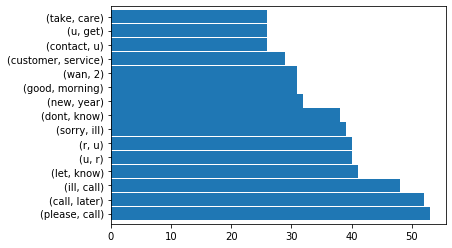

In [43]:
# Top 15 most frequent bigrams from all words
pd.Series(nltk.bigrams(all_words)).value_counts().head(15).plot.barh(width=.95)

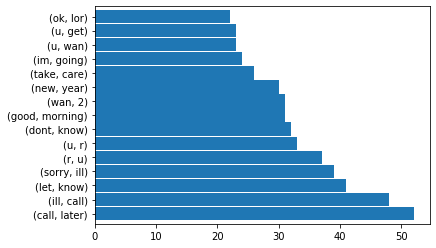

In [44]:
# Top 15 most frequent bigrams from all words
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(width=.95)

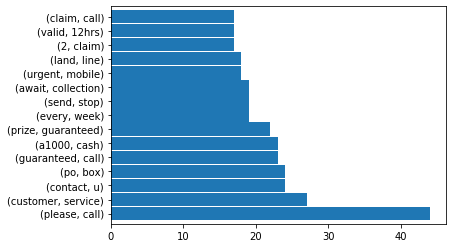

In [45]:
# Top 15 most frequent bigrams from all words
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(width=.95)

(-0.5, 1599.5, 1199.5, -0.5)

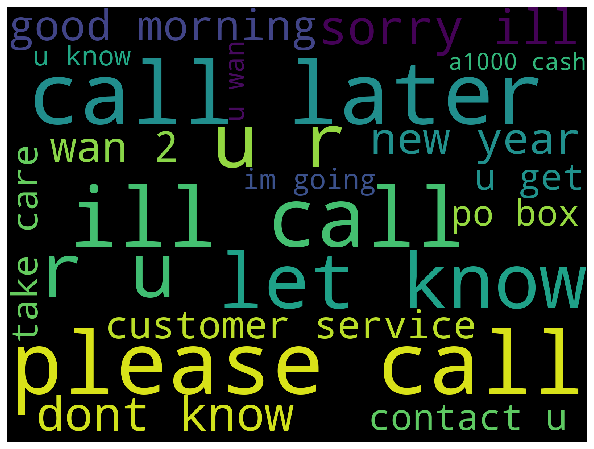

In [77]:
# Create a variable listing top 20 bigrams in all words
top_20_ham_bigrams = pd.Series(nltk.bigrams(all_words)).value_counts().head(20)

# Create a dictionary which includes the name of each bigram and its value count
data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}

# Graph it
img = WordCloud(
    background_color="black", width=1600, height=1200
).generate_from_frequencies(data)

plt.figure(figsize=(16, 8))
plt.imshow(img)
plt.axis("off")

(-0.5, 1599.5, 1199.5, -0.5)

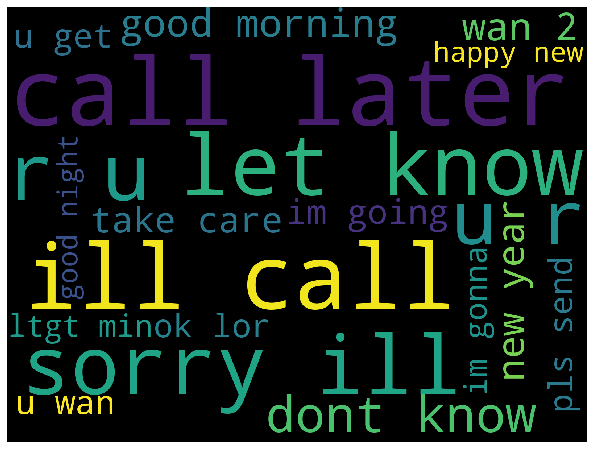

In [78]:
# Create a variable listing top 20 bigrams in all words
top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts().head(20)

# Create a dictionary which includes the name of each bigram and its value count
data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}

# Graph it
img = WordCloud(
    background_color="black", width=1600, height=1200
).generate_from_frequencies(data)

plt.figure(figsize=(16, 8))
plt.imshow(img)
plt.axis("off")

(-0.5, 1599.5, 1199.5, -0.5)

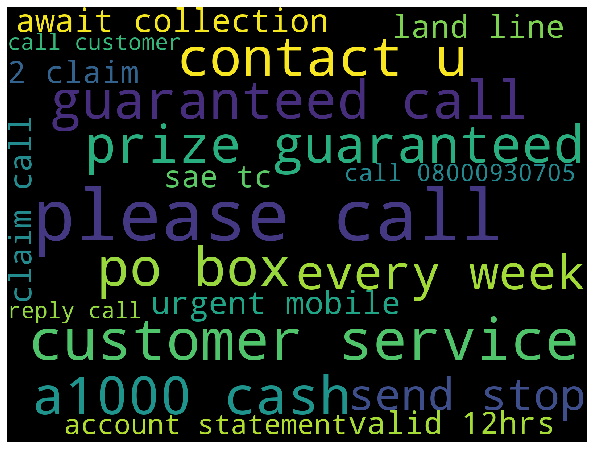

In [79]:
# Create a variable listing top 20 bigrams in all words
top_20_ham_bigrams = pd.Series(nltk.bigrams(spam_words)).value_counts().head(20)

# Create a dictionary which includes the name of each bigram and its value count
data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}

# Graph it
img = WordCloud(
    background_color="black", width=1600, height=1200
).generate_from_frequencies(data)

plt.figure(figsize=(16, 8))
plt.imshow(img)
plt.axis("off")

### and Trigrams

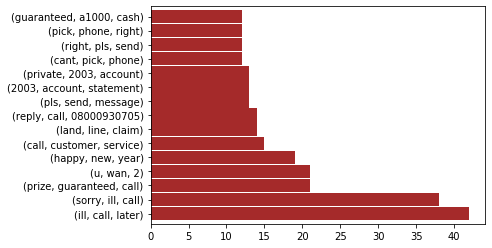

In [50]:
pd.Series(nltk.ngrams(all_words, 3)).value_counts().head(15).plot.barh(width=.95, color='brown')

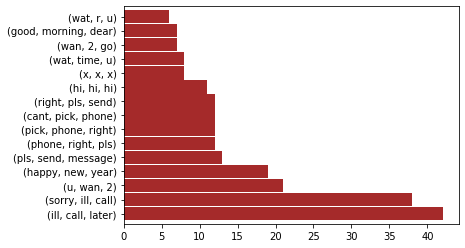

In [48]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(15).plot.barh(width=.95, color='brown')

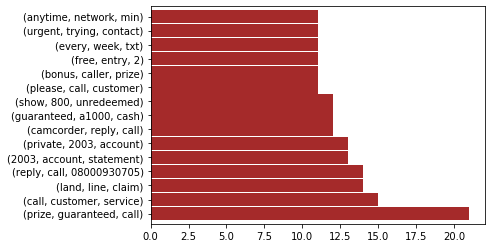

In [49]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(15).plot.barh(width=.95, color='brown')